In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz as gv
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import datetime
import sklearn.metrics as skmetrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./data/car_insurance_cold_calls.csv')

In [3]:
#Encode the data
dataEncoded = pd.get_dummies(data,columns = ['Job'], drop_first=True)
##Encode Job, Marital, Education, Communication,
#combine last contact day + last contact month , outcome
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Marital'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Communication'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Outcome'], drop_first=True)

In [4]:
dataEncoded.columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'CallStart', 'CallEnd', 'CarInsurance',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_married',
       'Marital_single', 'Education_secondary', 'Education_tertiary',
       'Communication_telephone', 'Outcome_other', 'Outcome_success'],
      dtype='object')

In [5]:
dataEncoded['CallEnd']=pd.to_datetime(dataEncoded['CallEnd'])
dataEncoded['CallStart']=pd.to_datetime(dataEncoded['CallStart'])
dataEncoded['CallDuration'] = dataEncoded['CallEnd'] - dataEncoded['CallStart']

In [6]:
valuesToAddToDF = []
for calldurationstamp in dataEncoded['CallDuration']:
    
    formattedCallDurationStamp = (str(calldurationstamp).split(' ')[2])
    ftr = [3600,60,1]
    valueToAdd = sum([a*b for a,b in zip(ftr, map(int,formattedCallDurationStamp.split(':')))])
    valuesToAddToDF.append(valueToAdd)


dataEncoded['CallDurationSeconds'] = valuesToAddToDF

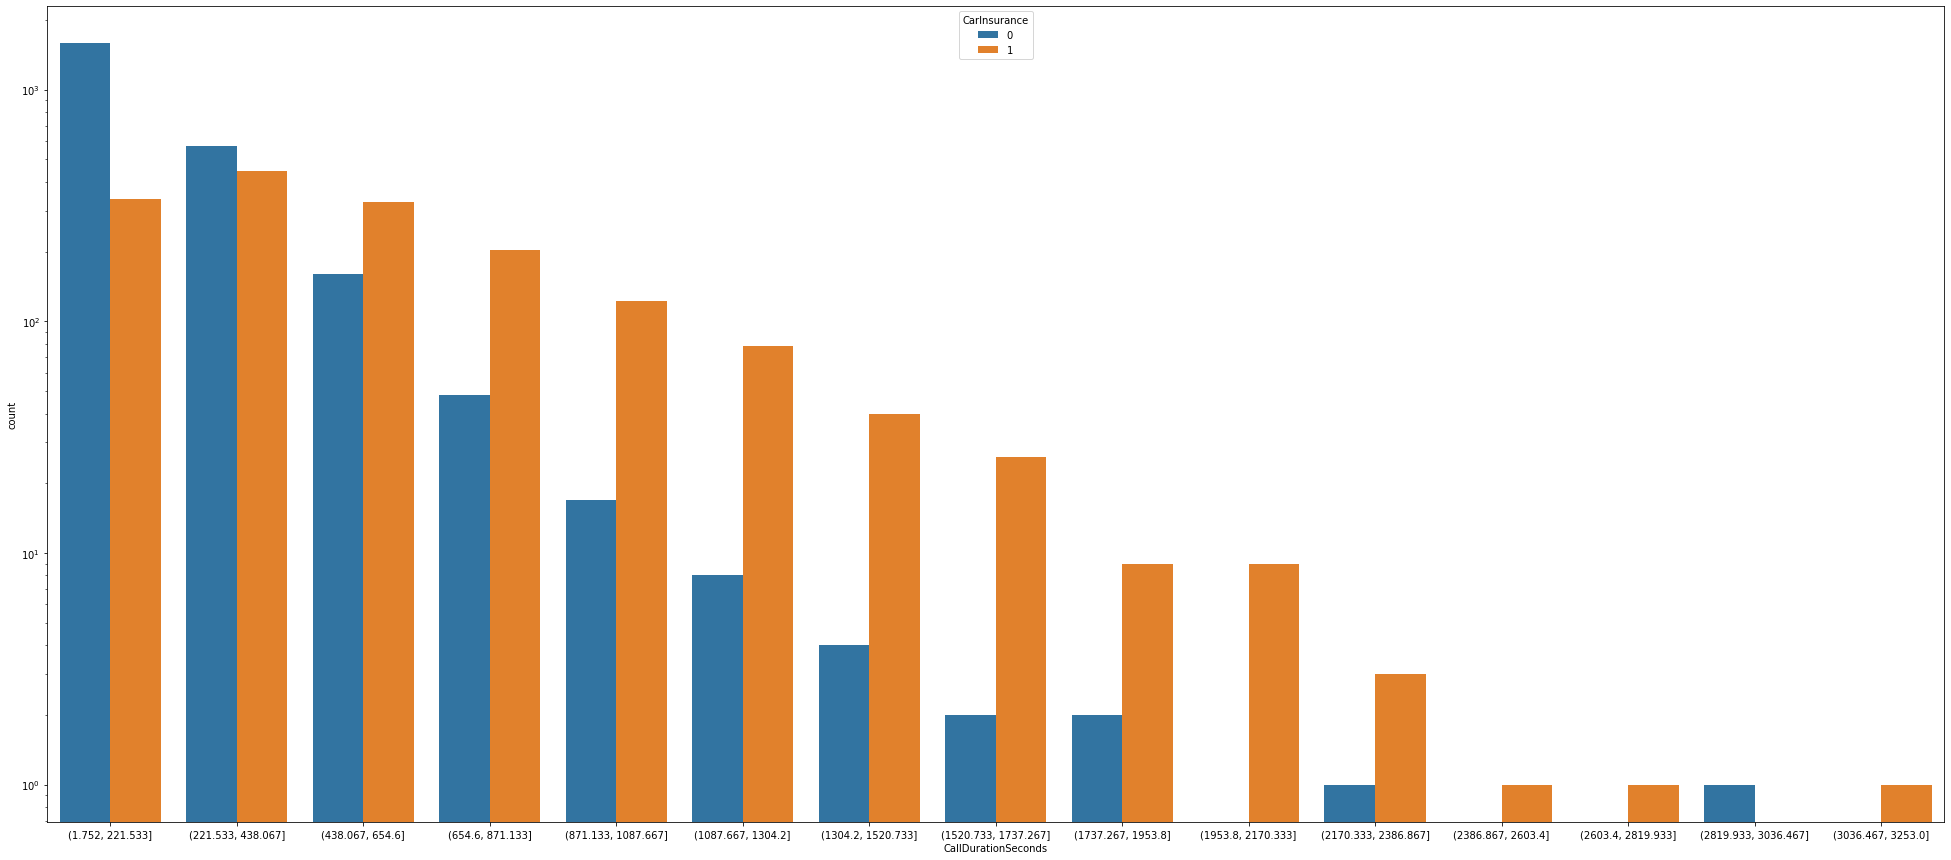

In [7]:
dataEncoded.sort_values("CallDurationSeconds", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')

valuesToAddToDF.sort()

callDurationBins=pd.cut(dataEncoded['CallDurationSeconds'],15)
#print(callDurationBins)
plt.figure(figsize=(34,15))
sns.countplot(callDurationBins, hue='CarInsurance', data=dataEncoded)
plt.yscale('log')

In [8]:
x=dataEncoded[['Age', 'Balance', 'HHInsurance', 'CarLoan',
        'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed',
       'Communication_telephone', 'Outcome_other', 'Outcome_success', 'CallDurationSeconds']]
y=dataEncoded['CarInsurance']

In [9]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
dtr5 = DecisionTreeClassifier(max_depth=5)
dtr10 = DecisionTreeClassifier(max_depth=10)
dtr15=DecisionTreeClassifier(max_depth=15)
rfr5 = RandomForestClassifier(max_depth=5, n_jobs = -1, n_estimators=2000)
rfr10 = RandomForestClassifier(max_depth=10, n_jobs = -1, n_estimators=2000)
rfr15 = RandomForestClassifier(max_depth=15, n_jobs = -1, n_estimators=2000)
rfr20 = RandomForestClassifier(max_depth=20, n_jobs = -1, n_estimators=2000)
rfr100 = RandomForestClassifier(max_depth=100, n_jobs = -1, n_estimators=2000)
gb5 = GradientBoostingClassifier(max_depth=5, n_estimators=2000)
gb10 = GradientBoostingClassifier(max_depth=10, n_estimators=2000)
gb15 = GradientBoostingClassifier(max_depth=15, n_estimators=2000)


In [10]:
#  regressor_dictionary = {'Logistic Regression':lr,
#                         #'Decision Tree depth 5':dtr5,
#                        #'Decision Tree depth 10': dtr10,
#                        'Decision Tree depth 15': dtr15,
#                         #'Random Forest depth 5':rfr5,
#                         #'Random Forest depth 10':rfr10,
#                         #'Random Forest depth 15':rfr15,
#                         #'Random Forest depth 20':rfr20,
#                         #'Random Forest depth 100':rfr100,
#                        "Gradient Boosting depth 5": gb5,
#                         "Gradient Boosting depth 10":gb10,
#                         "Gradient Boosting depth 15":gb15,}

# kf = KFold(n_splits = 6, shuffle=True)

# listOfAccuracyScore = []
# for key, regressor in regressor_dictionary.items():
#     print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#     for train_idx, test_idx in kf.split(x, y):
#         i=1
#         x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
#         x.iloc[test_idx], y.iloc[test_idx]
    
#         regressor.fit(x_train, y_train)
#         y_predicted = regressor.predict(x_test)
#         accuracy = (skmetrics.accuracy_score(y_test, y_predicted) * 100)
#         listOfAccuracyScore.append(accuracy)
#         fpr, tpr, thresholds=skmetrics.roc_curve(y_test, y_predicted)
#         #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test))
        
#         plt.figure(figsize=(15,8))
#         plt.subplot(3,3,i)
#         plt.plot(fpr,tpr, c='r', label='roc')
#         #plt.show()
#         i+=1
# #         print(y_test.value_counts())
# #         print("===============================================================")
# #         print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
# #         print('Our model has correctly classified {0}% of all observations in the test data' \
# #                  .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
# #         print("===============================================================")
#     average_accuracy_score = (sum(listOfAccuracyScore) / len(listOfAccuracyScore))
#     plt.show()
#     print("For " + key + " the average score is " + str(average_accuracy_score))
#     print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        

In [12]:
#Using predict proba to affect the threshold
regressor_dictionary = {'Logistic Regression':lr,
                        #'Decision Tree depth 5':dtr5,
                       #'Decision Tree depth 10': dtr10,
                       'Decision Tree depth 15': dtr15,
                        #'Random Forest depth 5':rfr5,
                        #'Random Forest depth 10':rfr10,
                        #'Random Forest depth 15':rfr15,
                        #'Random Forest depth 20':rfr20,
                        #'Random Forest depth 100':rfr100,
                       "Gradient Boosting depth 5": gb5}
kf = KFold(n_splits = 4, shuffle=True)

listOfAccuracyScore = []
for key, regressor in regressor_dictionary.items():
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for train_idx, test_idx in kf.split(x, y):
        i=1
        x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
        x.iloc[test_idx], y.iloc[test_idx]
    
        regressor.fit(x_train, y_train)
        y_predicted = regressor.predict(x_test)
        accuracy = (skmetrics.accuracy_score(y_test, y_predicted) * 100)
        listOfAccuracyScore.append(accuracy)
        fpr, tpr, thresholds=skmetrics.roc_curve(y_test, y_predicted)
        yprobs = regressor.predict_proba(x_test)
        
        numberOfYes = 0
        numberOfNo = 0
        threshold = 0.7
        index = 0
        arrayInYPredictFormat=[]
        for placeholder in yprobs:
            #print(placeholder)
            num1 = str(placeholder).split(' ')[0]
            num1 = float(num1[1:])
            num2 = str(placeholder).split(' ')[1]
            num2 = float(num2[:-1])
            #print(num1)
            #print(num2)
            if num1>threshold:
                numberOfYes+=1
                arrayInYPredictFormat.insert(0,1)
            else:
                numberOfNo+=1
                arrayInYPredictFormat.insert(0,0)
#         print("THIS IS Y PREDICTED")        
#         print(y_predicted.size)
#         print("THIS IS MY ONE")
#         print(len(arrayInYPredictFormat))
        
        
        print(skmetrics.confusion_matrix(y_test, arrayInYPredictFormat))
        print('Our model has correctly classified {0}% of all observations in the test data' \
                .format(skmetrics.accuracy_score(y_test, arrayInYPredictFormat) * 100))
        #print ("############THE NUMBER OF YES", numberOfYes)
        #print ("############THE NUMBER OF NO", numberOfNo)
        #print ("############THE length OF yesNO", len(arrayInYPredictFormat))
        
    #print("the size of the predicted y is " + str(y_predicted.shape) + "for " + key)
    #print ("the size of y using predict proba is " +str(yprobs.shape)  + "for " + key)
#     numberOfYes = 0
#     numberOfNo = 0
#     for item in arrayInYPredictFormat:
#         if item == 1:
#             numberOfYes +=1
            
#         else:
#             numberOfNo +=1
        
#     print ("THE NUMBER OF YES", numberOfYes)
#     print ("THE NUMBER OF NO", numberOfNo)
        
        #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test))
        
        #plt.figure(figsize=(15,8))
        #plt.subplot(3,3,i)
        #plt.plot(fpr,tpr, c='r', label='roc')
        #i+=1
    #average_accuracy_score = (sum(listOfAccuracyScore) / len(listOfAccuracyScore))
    #plt.show()
    #print("For " + key + " the average score is " + str(average_accuracy_score))
    #print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[382 214]
 [104 300]]
Our model has correctly classified 68.2% of all observations in the test data
[[370 229]
 [110 291]]
Our model has correctly classified 66.10000000000001% of all observations in the test data
[[391 230]
 [103 276]]
Our model has correctly classified 66.7% of all observations in the test data
[[375 205]
 [133 287]]
Our model has correctly classified 66.2% of all observations in the test data
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[317 277]
 [111 295]]
Our model has correctly classified 61.199999999999996% of all observations in the test data
[[325 249]
 [112 314]]
Our model has correctly classified 63.9% of all observations in the test data
[[301 299]
 [ 95 305]]
Our model has correctly classified 60.6% of all observations in the test data
[[311 317]
 [ 74 298]]
Our model has correctly classified 60.9% of all observations in the test data
+++++++++